# Stability and condition

In this notebook we will have a look at the different kernels and the problems occuring while using them for Gaussian process quadrature.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

In [2]:
def kernel_PBK(x, y, b):
    return 1/(1-b*x*y)

def kernel_trig(x, y, b):
    lower = 1 + np.square(b) - 2*b*np.cos(2*np.pi*(x-y))
    upper = 1 - np.square(b)
    return 0.5 + 0.5 * upper / lower

For the first example we will take an equidistant grid of values in the interval $(0, 1)$ since the Trigonometric Basis kernel does only take those values as an input and the Polynomial Basis kernel has this interval as a subset.

## Kernels & their covariance matrices

In [3]:
n = 5
h = 0.01
X1 = np.linspace(-0.99, 0.99, n)
X1t = np.linspace(0.01, 0.99, n)
rng = np.random.default_rng(1)
X3 = (2) * rng.random((n,)) - 1


b = np.linspace(h, 1-h, 99)
cond1 = np.zeros(99)
cond2 = np.zeros(99)
cond3 = np.zeros(99)
cond1t = np.zeros(99)
cond2t = np.zeros(99)
cond3t = np.zeros(99)

X2t = np.array([0., 0.2000208, 0.40001446, 0.59998812, 0.7999977])

K_PBK_1 = np.zeros((99, n, n))
K_PBK_2 = np.zeros((99, n, n))
K_PBK_3 = np.zeros((99, n, n))
K_T_1 = np.zeros((99, n, n))
K_T_2 = np.zeros((99, n, n))
K_T_3 = np.zeros((99, n, n))
K_PBK_inv_1 = np.zeros((99, n, n))
K_PBK_inv_2 = np.zeros((99, n, n))
K_PBK_inv_3 = np.zeros((99, n, n))
K_T_inv_1 = np.zeros((99, n, n))
K_T_inv_2 = np.zeros((99, n, n))
K_T_inv_3 = np.zeros((99, n, n))
for k in range(0, 99):
    index = int(0.01 * (k+1))
    X2 = np.loadtxt("./Nodes/" + 'PolynomialBasis' + ", " + "{}".format(n) + ", " + "{}".format(h) + ".txt")[index]
    for i in range(0, n):
        for j in range(0, n):
            K_PBK_1[k][i, j] = kernel_PBK(X1[i], X1[j], b[k])
            K_PBK_2[k][i, j] = kernel_PBK(X2[i], X2[j], b[k])
            K_PBK_3[k][i, j] = kernel_PBK(X3[i], X3[j], b[k])
            K_T_1[k][i, j] = kernel_trig(X1t[i], X1t[j], b[k])
            K_T_2[k][i, j] = kernel_trig(X2t[i], X2t[j], b[k])
            K_T_3[k][i, j] = kernel_trig(X3[i], X3[j], b[k])
            
    cond1[k] = np.linalg.cond(K_PBK_1[k])
    cond2[k] = np.linalg.cond(K_PBK_2[k])
    cond3[k] = np.linalg.cond(K_PBK_3[k])
    cond1t[k] = np.linalg.cond(K_T_1[k])
    cond2t[k] = np.linalg.cond(K_T_2[k])
    cond3t[k] = np.linalg.cond(K_T_3[k])

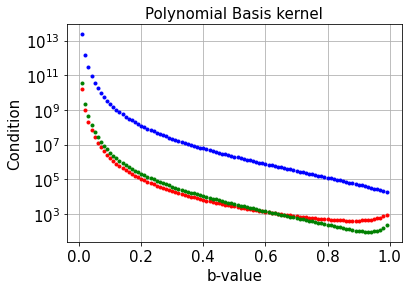

In [4]:
plt.figure()
plt.grid()
plt.plot(b, cond1, 'r.')
plt.plot(b, cond2, 'g.')
plt.plot(b, cond3, 'b.')
plt.yscale('log')
plt.xlabel('b-value', fontsize=15)
plt.ylabel('Condition', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Polynomial Basis kernel', fontsize=15)
plt.show()

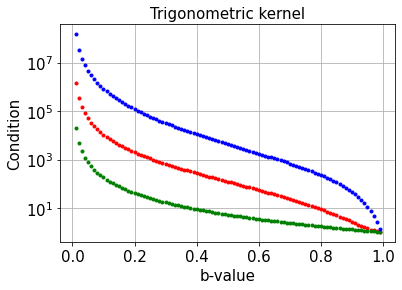

In [5]:
plt.figure()
plt.grid()
plt.plot(b, cond1t, 'r.')
plt.plot(b, cond2t, 'g.')
plt.plot(b, cond3t, 'b.')
plt.yscale('log')
plt.xlabel('b-value', fontsize=15)
plt.ylabel('Condition', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Trigonometric kernel', fontsize=15)
plt.show()

# $n=7$

In [6]:
n = 7
h = 0.01
X1 = np.linspace(-0.99, 0.99, n)
X1t = np.linspace(0.01, 0.99, n)
rng = np.random.default_rng(1)
X3 = (2) * rng.random((n,)) - 1


b = np.linspace(h, 1-h, 99)
cond1 = np.zeros(99)
cond2 = np.zeros(99)
cond3 = np.zeros(99)
cond1t = np.zeros(99)
cond2t = np.zeros(99)
cond3t = np.zeros(99)

X2t = np.array([0., 0.14284804, 0.57144601, 0.28570868, 0.85714408, 0.42856753, 0.71430922])

K_PBK_1 = np.zeros((99, n, n))
K_PBK_2 = np.zeros((99, n, n))
K_PBK_3 = np.zeros((99, n, n))
K_T_1 = np.zeros((99, n, n))
K_T_2 = np.zeros((99, n, n))
K_T_3 = np.zeros((99, n, n))
K_PBK_inv_1 = np.zeros((99, n, n))
K_PBK_inv_2 = np.zeros((99, n, n))
K_PBK_inv_3 = np.zeros((99, n, n))
K_T_inv_1 = np.zeros((99, n, n))
K_T_inv_2 = np.zeros((99, n, n))
K_T_inv_3 = np.zeros((99, n, n))
for k in range(0, 99):
    index = int(0.01 * (k+1))
    X2 = np.loadtxt("./Nodes/" + 'PolynomialBasis' + ", " + "{}".format(n) + ", " + "{}".format(h) + ".txt")[index]
    for i in range(0, n):
        for j in range(0, n):
            K_PBK_1[k][i, j] = kernel_PBK(X1[i], X1[j], b[k])
            K_PBK_2[k][i, j] = kernel_PBK(X2[i], X2[j], b[k])
            K_PBK_3[k][i, j] = kernel_PBK(X3[i], X3[j], b[k])
            K_T_1[k][i, j] = kernel_trig(X1t[i], X1t[j], b[k])
            K_T_2[k][i, j] = kernel_trig(X2t[i], X2t[j], b[k])
            K_T_3[k][i, j] = kernel_trig(X3[i], X3[j], b[k])
            
    cond1[k] = np.linalg.cond(K_PBK_1[k])
    cond2[k] = np.linalg.cond(K_PBK_2[k])
    cond3[k] = np.linalg.cond(K_PBK_3[k])
    cond1t[k] = np.linalg.cond(K_T_1[k])
    cond2t[k] = np.linalg.cond(K_T_2[k])
    cond3t[k] = np.linalg.cond(K_T_3[k])

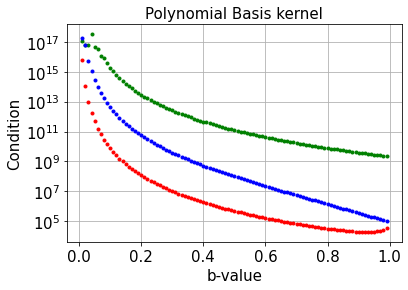

In [7]:
plt.figure()
plt.grid()
plt.plot(b, cond1, 'r.')
plt.plot(b, cond2, 'g.')
plt.plot(b, cond3, 'b.')
plt.yscale('log')
plt.xlabel('b-value', fontsize=15)
plt.ylabel('Condition', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Polynomial Basis kernel', fontsize=15)
plt.show()

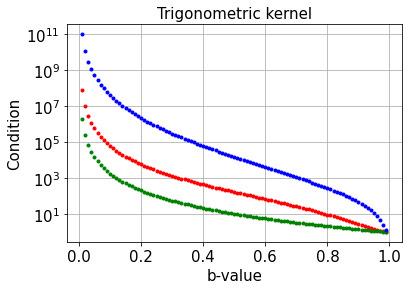

In [8]:
plt.figure()
plt.grid()
plt.plot(b, cond1t, 'r.')
plt.plot(b, cond2t, 'g.')
plt.plot(b, cond3t, 'b.')
plt.yscale('log')
plt.xlabel('b-value', fontsize=15)
plt.ylabel('Condition', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Trigonometric kernel', fontsize=15)
plt.show()